![texto alternativo](https://)# **Operaciones de Agrupación en Python con Pandas**
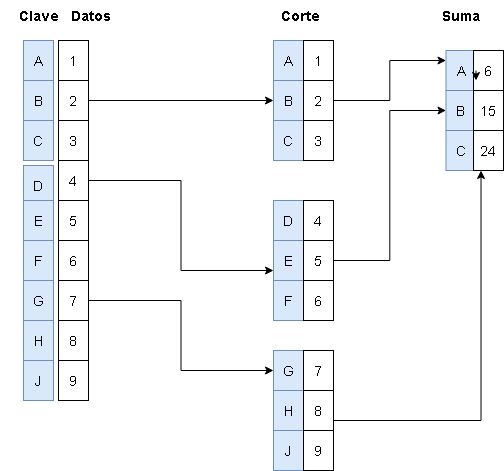)



In [0]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],'data1' : np.random.randn(5),'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.036552,-1.261516
1,a,two,-0.706916,-1.602523
2,b,one,-1.342944,-0.763260
3,b,two,-0.455256,-0.888883
4,a,one,-0.550041,-0.460461


In [0]:
 grouped = df['data1'].groupby(df['key1'])
 grouped
 grouped.mean()

key1
a   -0.431169
b   -0.899100
Name: data1, dtype: float64

# **Agurpaciones con  Arrays tipo Numpy **

In [0]:
paises = np.array(['España', 'España', 'Francia', 'Francia', 'España'])

años = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([paises, años]).mean()

España   2005   -0.371734
         2006   -0.550041
Francia  2005   -0.455256
         2006   -1.342944
Name: data1, dtype: float64

In [0]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.157438,-0.515486
b,-0.519316,-0.343435


# **Iteración con ordenamiento**

In [0]:
 for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.297485 -1.334285
1    a  two  1.049036 -0.931515
4    a  one -1.277376 -0.030917
b
  key1 key2     data1     data2
2    b  one -0.104506 -0.782549
3    b  two  0.259285  0.250861


## **Iteración con ordenamiento por dos claves**

In [0]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
          print((k1, k2))
          print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.297485 -1.334285
4    a  one -1.277376 -0.030917
('a', 'two')
  key1 key2     data1     data2
1    a  two  1.049036 -0.931515
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.104506 -0.782549
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.259285  0.250861


# **Selección de columnas**

In [0]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one    -0.682601
      two    -0.931515
b     one    -0.782549
      two     0.250861
Name: data2, dtype: float64

# ***Agrupación de Series y Diccionarios***

In [0]:
people = pd.DataFrame(np.random.randn(5, 5),
                  columns=['a', 'b', 'c', 'd', 'e'],
                    index=['Kevin', 'Pedro', 'Javier', 'Jose', 'Manuel'])
people

,a,b,c,d,e
Kevin,0.007420,-0.302048,0.014434,-0.338628,0.905997
Pedro,0.522252,0.326429,-0.625320,-0.021452,0.100213
Javier,-0.668246,0.474284,-0.770481,0.576830,-0.509469
Jose,-0.241369,0.289955,1.802652,-0.386258,0.796447
Manuel,1.113607,-1.668040,0.416800,0.829726,-0.264851


In [0]:
people.iloc[1:3, [1, 2]] = np.nan 
people

,a,b,c,d,e
Kevin,0.007420,-0.302048,0.014434,-0.338628,0.905997
Pedro,0.522252,NaN,NaN,-0.021452,0.100213
Javier,-0.668246,NaN,NaN,0.576830,-0.509469
Jose,-0.241369,0.289955,1.802652,-0.386258,0.796447
Manuel,1.113607,-1.668040,0.416800,0.829726,-0.264851


In [0]:
mapping = {'a': 'Azul', 'b': 'Azul', 'c': 'Amarillo',
          'd': 'Amarillo', 'e': 'Violeta', 'f' : 'Amarillo'}


In [0]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,Amarillo,Azul,Violeta
Kevin,1.560374,-0.388258,-1.221212
Pedro,0.113202,-0.197135,-1.373783
Javier,1.446846,-0.508438,-1.011950
Jose,-0.355058,0.390485,1.686790
Manuel,1.570421,-1.410675,-0.552835


# **Agrupación de Series**


In [0]:
map_series = pd.Series(mapping)
map_series

a        Azul
b        Azul
c    Amarillo
d    Amarillo
e     Violeta
f    Amarillo
dtype: object

In [0]:
people.groupby(map_series, axis=1).count()

,Amarillo,Azul,Violeta
Kevin,2,2,1
Pedro,1,1,1
Javier,1,1,1
Jose,2,2,1
Manuel,2,2,1


# **Ejemplo Real ** 

In [0]:
tips = pd.read_csv('tips.csv')

In [0]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [0]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
a,3.0,-0.431169,0.350635,-0.706916,-0.628478,-0.550041,-0.293296,-0.036552
b,2.0,-0.899100,0.627690,-1.342944,-1.121022,-0.899100,-0.677178,-0.455256


# **Campos Agregados**

In [0]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


# **Agrupación por una atributo**

In [0]:
grouped = tips.groupby(['day','tip_pct'])
grouped

KeyError: ignored

In [0]:
grouped.describe()

total_bill                        ...   tip_pct                    
                 count       mean        std  ...       50%       75%       max
day  smoker                                   ...                              
Fri  No            4.0  18.420000   5.059282  ...  0.149241  0.163652  0.187735
     Yes          15.0  16.813333   9.086388  ...  0.173913  0.209240  0.263480
Sat  No           45.0  19.661778   8.939181  ...  0.150152  0.183915  0.291990
     Yes          42.0  21.276667  10.069138  ...  0.153624  0.190502  0.325733
Sun  No           57.0  20.506667   8.130189  ...  0.161665  0.185185  0.252672
     Yes          19.0  24.120000  10.442511  ...  0.138122  0.215325  0.710345
Thur No           45.0  17.113111   7.721728  ...  0.153492  0.184843  0.266312
     Yes          17.0  19.190588   8.355149  ...  0.153846  0.194837  0.241255

[8 rows x 32 columns]

In [0]:
grouped.mean()

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


# **Uso de Funciones Agregadas**

In [0]:
functions = ['count', 'mean', 'max']

result = grouped['tip_pct', 'total_bill'].agg(functions)
result


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [0]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

# Agrupación mostrando los Indices

In [0]:
 tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


# **Practicas Simples**

# ¿Como harías para ordenar por propina y obtener solo la primera de cada linea?

In [0]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [0]:
tp = tips.groupby('tip')
tp.first()

,total_bill,sex,smoker,day,time,size,tip_pct
tip,,,,,,,
1.00,3.07,Female,Yes,Sat,Dinner,1,0.325733
1.01,16.99,Female,No,Sun,Dinner,2,0.059447
1.10,12.90,Female,Yes,Sat,Dinner,2,0.085271
1.17,32.83,Male,Yes,Sat,Dinner,2,0.035638
1.25,10.51,Male,No,Sat,Dinner,2,0.118934
...,...,...,...,...,...,...,...
6.70,34.30,Male,No,Thur,Lunch,6,0.195335
6.73,48.27,Male,No,Sat,Dinner,4,0.139424
7.58,39.42,Male,No,Sat,Dinner,4,0.192288


# ¿Como harias para obtener solo las propinan que fueran iguales a 1.00?

In [0]:
tp.get_group(1.00) 

,total_bill,sex,smoker,day,time,size,tip_pct
67,3.07,Female,Yes,Sat,Dinner,1,0.325733
92,5.75,Female,Yes,Fri,Dinner,2,0.173913
111,7.25,Female,No,Sat,Dinner,1,0.137931
236,12.60,Male,Yes,Sat,Dinner,2,0.079365


# ¿Como harías para **ordenar** por  sexo y dia , elegiendo el primer elemento?

tips2 = tips.groupby(['sex', 'day'])

In [0]:
tips2 = tips.groupby(['sex', 'day'])
tips2
tips2.first()

total_bill   tip smoker    time  size   tip_pct
sex    day                                                  
Female Fri         5.75  1.00    Yes  Dinner     2  0.173913
       Sat        20.29  2.75     No  Dinner     2  0.135535
       Sun        16.99  1.01     No  Dinner     2  0.059447
       Thur       10.07  1.83     No   Lunch     1  0.181728
Male   Fri        28.97  3.00    Yes  Dinner     2  0.103555
       Sat        20.65  3.35     No  Dinner     3  0.162228
       Sun        10.34  1.66     No  Dinner     3  0.160542
       Thur       27.20  4.00     No   Lunch     4  0.147059

# **¿Como harías para ordenar por las filas que tengan los valores mas altos de commpras?**

In [0]:
tips.sort_values("total_bill", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
...,...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
111,7.25,1.00,Female,No,Sat,Dinner,1,0.137931
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
92,5.75,1.00,Female,Yes,Fri,Dinner,2,0.173913


,total_bill,tip,sex,smoker,day,time,size,tip_pct
93,16.32,4.30,Female,Yes,Fri,Dinner,2,0.263480
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
